In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Breast_cancer_data.csv")

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
df.shape

(569, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [20]:
df.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


In [21]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


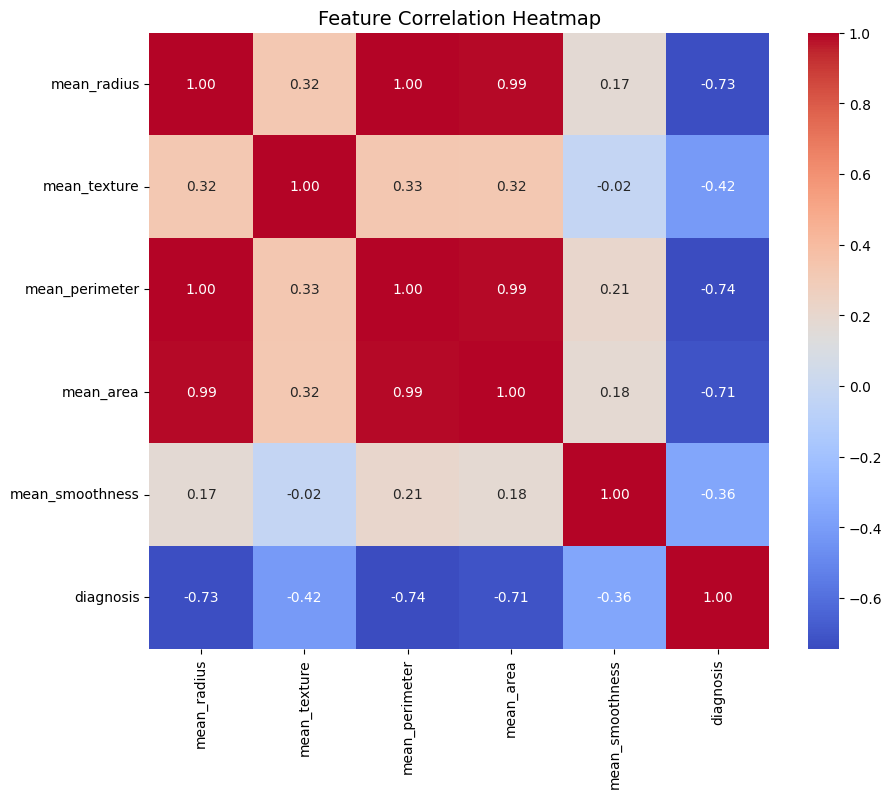

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

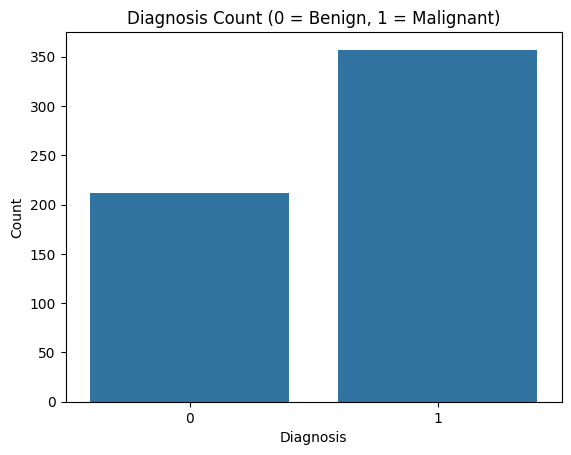

In [27]:
sns.countplot(x='diagnosis', data=df)
plt.title("Diagnosis Count (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [7]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578,  0.57795264, -0.84048388],
       [ 1.83834103,  2.33645719,  1.98252415,  1.73521799,  1.52576706],
       [-1.80840125,  1.22179204, -1.81438851, -1.34778924, -3.11208479]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
nb_model = GaussianNB()

In [15]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [17]:
print(nb_model.score(X_train, y_train)*100, nb_model.score(X_test,y_test)*100)

89.67032967032968 94.73684210526315


In [31]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print("Naive Bayes Accuracy are : ",accuracy)

Naive Bayes Accuracy are :  0.9473684210526315


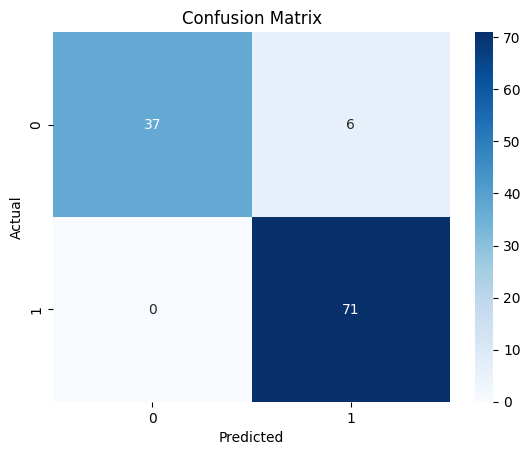

In [33]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()